In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import NearestCentroid

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.datasets import load_wine

In [2]:
def sigmoid(z, prime=False):
   if prime:
      return z * (1 - z)
   return 1 / (1 + np.exp(-z))

In [3]:
def tanh(z, prime=False):
   if prime:
      return 1 - z ** 2
   return np.tanh(z)

In [4]:
def relu(z, prime=False):
   if prime:
      if z <= 0:
            return 0
      else:
            return 1
   return np.maximum(0, z)

In [5]:
def leaky_relu(z, prime=False):
   epsilon = 0.1 # epsilon should be much smaller
   if prime:
      if z <= 0:
            return -epsilon
      else:
            return 1
   return np.maximum(z * epsilon, z)

In [6]:
X = np.array([[0,0], [0,1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [7]:
mlpc = MLPClassifier(max_iter=5000)
mlpc.fit(X, y)

mlpc.predict(X)

array([0, 1, 1, 0])

In [8]:
h = mlpc.predict(X)

In [9]:
h

array([0, 1, 1, 0])

In [10]:
#Assignment 12
#Nearest neighbor - NOT WORKING
n_clf = NearestCentroid()
n_clf.fit(X, y)

NearestCentroid()

In [11]:
print(n_clf.predict(X))

[0 0 0 0]


In [12]:
#SGD - NOT WORKING
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [13]:
sgd_clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd_clf.fit(X, y)
print(sgd_clf.predict(X))

[0 0 0 0]


C:\Users\Jeppe N. Dyekjær\Documents\4.Softwareudvikling_KEA\6. Semester\Git_Projekter\AI_Tasks\jupyter_work_tasks\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [14]:
 #SVC - WORKING
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [15]:
print(svc_clf.predict(X))

[0 1 1 0]


In [16]:
#Wine data
wine_df= pd.DataFrame(load_wine().data, columns=load_wine().feature_names)

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


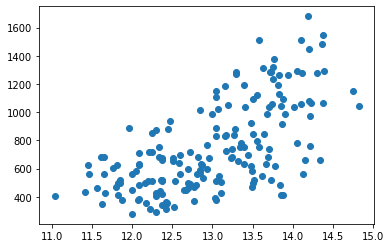

In [17]:
x_alcohol = wine_df["alcohol"]
y_proline = wine_df["proline"]
plt.scatter(x_alcohol, y_proline)

In [18]:
mlpc_wine = MLPClassifier(max_iter=1000)
x_alcohol_shape = x_alcohol.to_numpy().reshape(-1, 1)
y_proline_shape = y_proline.to_numpy()

mlpc_wine.fit(x_alcohol_shape, y_proline_shape)
mlpc_wine.predict(x_alcohol_shape)

array([680., 680., 520., 680., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 680., 680., 680., 680., 680., 680., 520.,
       680., 520., 680., 520., 680., 680., 680., 680., 680., 680., 680.,
       680., 680., 680., 680., 520., 520., 680., 680., 680., 680., 680.,
       520., 680., 680., 680., 680., 680., 520., 680., 680., 680., 680.,
       680., 680., 680., 680., 520., 520., 520., 680., 520., 520., 520.,
       520., 520., 680., 520., 520., 680., 680., 520., 520., 520., 520.,
       520., 520., 520., 520., 520., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 520., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 520., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 520., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 520., 520., 520., 520., 520., 520., 520.,
       520., 520., 520., 520., 520., 520., 680., 520., 520., 680., 680.,
       680., 520., 520., 680., 520., 680., 520., 68

In [19]:
svc_clf_wine = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf_wine.fit(x_alcohol_shape, y_proline_shape)
x_alcohol_shape_two_features = x_alcohol_shape.iloc[:, :2].values
print(sgd_clf.predict(x_alcohol_shape_two_features))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'